# 13장. 언더피팅의 진단과 해결책
## 13.1 학습 반복 횟수 재설정

In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# 학습용 데이터 생성
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = x_train**3 + 0.1 * x_train**2 -0.15 * x_train + 1.0 + 0.5 * np.random.rand(len(x_train))

# 테스트용 데이터 생성
x_test = np.linspace(-1,1,50)
y_test = x_test**3 + 0.1 * x_test**2 -0.15 * x_test + 1.0 + 0.5 * np.random.rand(len(x_test))

In [3]:
# 입력값 설정
features_train = np.array([[xval] for xval in x_train])
labels_train = y_train.reshape(-1, 1)

features_test = np.array([[xval] for xval in x_test])
labels_test = y_test.reshape(-1, 1)

In [4]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 64
        num_hidden2 = 64

        self.W1 = tf.Variable(tf.random.normal([1, num_hidden1], seed=624)) 
        self.b1 = tf.Variable(tf.random.normal([num_hidden1], seed=624)) 

        self.W2 = tf.Variable(tf.random.normal([num_hidden1, num_hidden2], seed=624)) 
        self.b2 = tf.Variable(tf.random.normal([num_hidden2], seed=624)) 

        self.W3 = tf.Variable(tf.random.normal([num_hidden2, 1], seed=624)) 
        self.b3 = tf.Variable(tf.random.normal([1], seed=624)) 

    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1
        h1 = tf.nn.sigmoid(l1)

        l2 = tf.matmul(h1, self.W2) + self.b2
        h2 = tf.nn.sigmoid(l2)

        yhat = tf.matmul(h2, self.W3) + self.b3
        return yhat

In [5]:
model = MyModel()

loss = lambda y, yhat: tf.reduce_mean(tf.square( yhat - y ))

In [6]:
# 하이퍼 파라미터
MaxEpochs = 200
batch_size = 10
lr = 1E-4

# 수치최적화 알고리즘
optimizer = tf.keras.optimizers.Adam(lr)

# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features_train[shuffled_id]
shuffled_y_train = labels_train[shuffled_id]

# 손실함수 기록용 변수
loss_train_history = []
loss_test_history = []

In [7]:
# 스토캐스틱 방법
from helper import generate_batches
for epoch in range(MaxEpochs):
    if epoch % 100 == 0:
        curr_loss = loss(labels_train, model(features_train))
        print(epoch, curr_loss.numpy())
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    loss_train = loss(labels_train, model(features_train))
    loss_test = loss(labels_test, model(features_test))
    loss_train_history.append(loss_train)
    loss_test_history.append(loss_test)

0 161.36703
100 17.56832


In [8]:
def visualize_l2(pred, x_train, y_train, x_test, y_test):
    from matplotlib.patches import Rectangle
    plt.plot(x_train, y_train, '.k', markersize=7, markerfacecolor='none', label='Train Data')
    plt.plot(x_train, pred,  '--k', label='Model')
    plt.plot(x_test, y_test, 'xk', markersize=4, markerfacecolor='none', label='Test Data')
    currentAxis = plt.gca()
    for k, (xx,yy) in enumerate(zip(x_train, y_train)):
        error = pred[k] - yy
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        error, error,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.legend(loc='upper left')
    plt.xlabel('x')
    plt.ylabel('y')

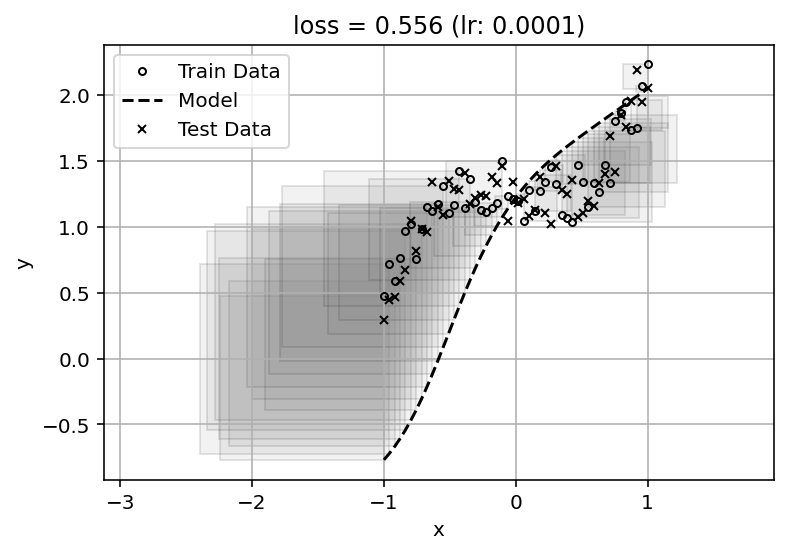

In [9]:
prediction_values = model(features_train)
final_loss = loss(labels_train, prediction_values)
plt.title("loss = {:1.3f} (lr: {})".format(final_loss, lr))
visualize_l2(prediction_values.numpy().reshape(-1), x_train, y_train, x_test, y_test)
plt.show()

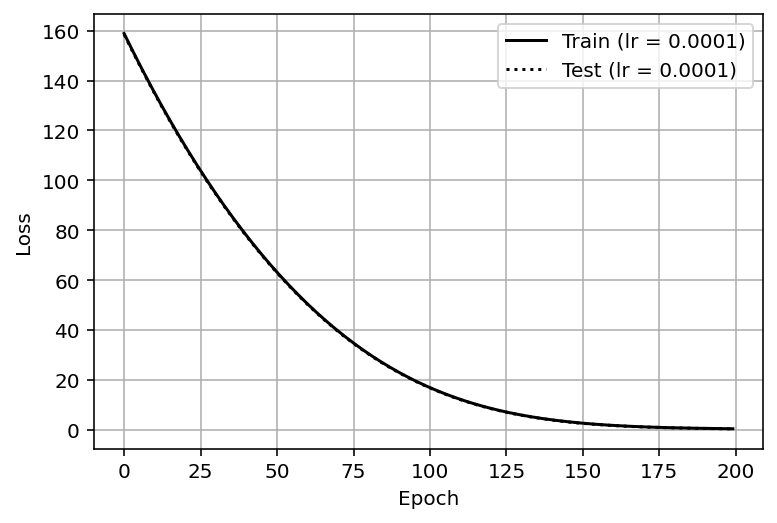

In [10]:
plt.plot(loss_train_history, '-k', label='Train (lr = {})'.format(lr))
plt.plot(loss_test_history, ':k', label='Test (lr = {})'.format(lr))
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

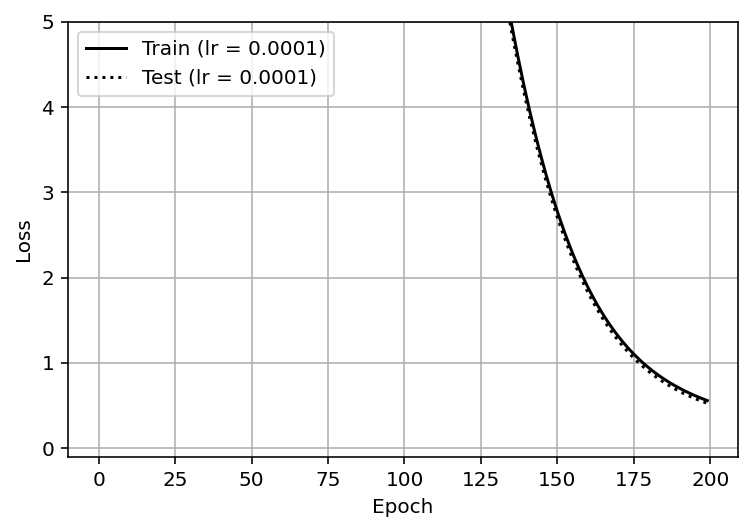

In [11]:
plt.plot(loss_train_history, '-k', label='Train (lr = {})'.format(lr))
plt.plot(loss_test_history, ':k', label='Test (lr = {})'.format(lr))
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([-.1, 5])
plt.legend()
plt.show()

### 학습 반복 횟수 변경

In [12]:
model = MyModel()

# 하이퍼 파라미터
MaxEpochs = 2000
batch_size = 10
lr = 1E-4

# 수치최적화 알고리즘
optimizer = tf.keras.optimizers.Adam(lr)

# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features_train[shuffled_id]
shuffled_y_train = labels_train[shuffled_id]

# 손실함수 기록용 변수
loss_train_history = []
loss_test_history = []

# 스토캐스틱 방법
from helper import generate_batches
for epoch in range(MaxEpochs):
    if epoch % 100 == 0:
        curr_loss = loss(labels_train, model(features_train))
        print(epoch, curr_loss.numpy())
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    loss_train = loss(labels_train, model(features_train))
    loss_test = loss(labels_test, model(features_test))
    loss_train_history.append(loss_train)
    loss_test_history.append(loss_test)

0 42.12346
100 1.3245451
200 0.053554025
300 0.032580093
400 0.030452127
500 0.029889464
600 0.02925975
700 0.02851729
800 0.027667046
900 0.026722679
1000 0.025707446
1100 0.024652291
1200 0.023594543
1300 0.022574887
1400 0.021634892
1500 0.020811334
1600 0.020129891
1700 0.019599056
1800 0.01920923
1900 0.01893662


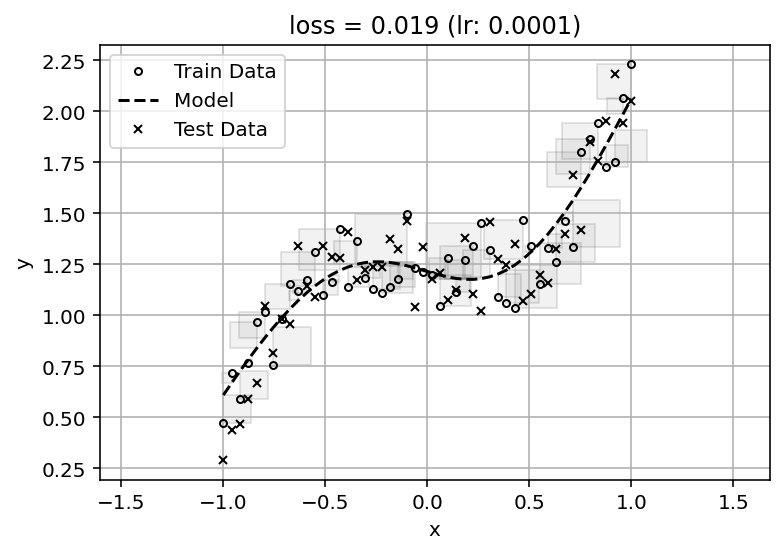

In [13]:
prediction_values = model(features_train)
final_loss = loss(labels_train, prediction_values)
plt.title("loss = {:1.3f} (lr: {})".format(final_loss, lr))
visualize_l2(prediction_values.numpy().reshape(-1), x_train, y_train, x_test, y_test)
plt.show()

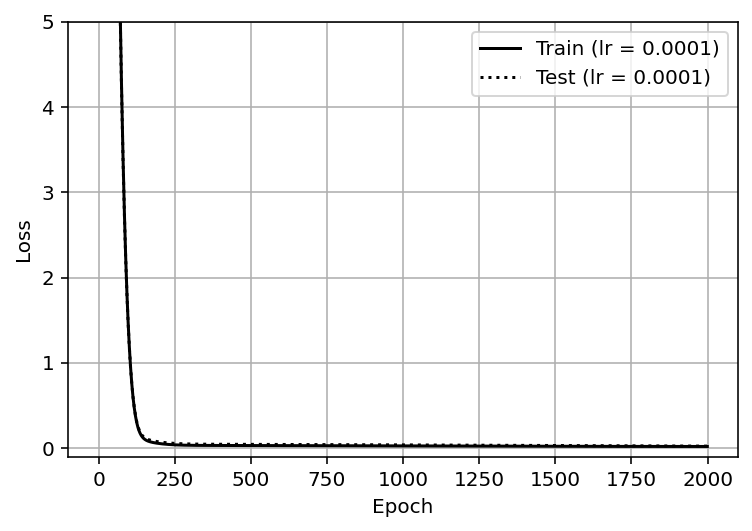

In [14]:
plt.plot(loss_train_history, '-k', label='Train (lr = {})'.format(lr))
plt.plot(loss_test_history, ':k', label='Test (lr = {})'.format(lr))
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([-.1, 5])
plt.legend()
plt.show()

## 13.2 학습률 재설정

In [15]:
model = MyModel()

# 하이퍼 파라미터
MaxEpochs = 200
batch_size = 10
lr = 1.0

# 수치최적화 알고리즘
optimizer = tf.keras.optimizers.Adam(lr)

# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features_train[shuffled_id]
shuffled_y_train = labels_train[shuffled_id]

# 손실함수 기록용 변수
loss_train_history = []
loss_test_history = []

# 스토캐스틱 방법
from helper import generate_batches
for epoch in range(MaxEpochs):
    if epoch % 100 == 0:
        curr_loss = loss(labels_train, model(features_train))
        print(epoch, curr_loss.numpy())
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    loss_train = loss(labels_train, model(features_train))
    loss_test = loss(labels_test, model(features_test))
    loss_train_history.append(loss_train)
    loss_test_history.append(loss_test)

0 18.10932
100 0.11898218


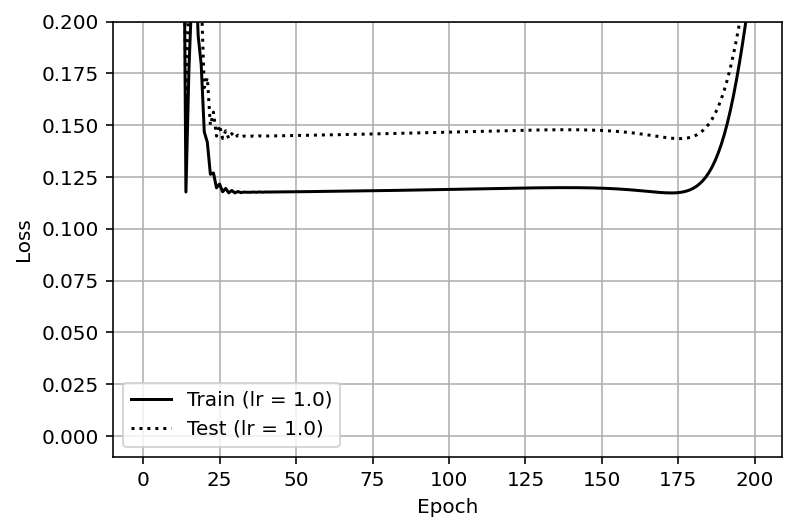

In [16]:
plt.plot(loss_train_history, '-k', label='Train (lr = {})'.format(lr))
plt.plot(loss_test_history, ':k', label='Test (lr = {})'.format(lr))
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([-.01, 0.2])
plt.legend()
plt.show()

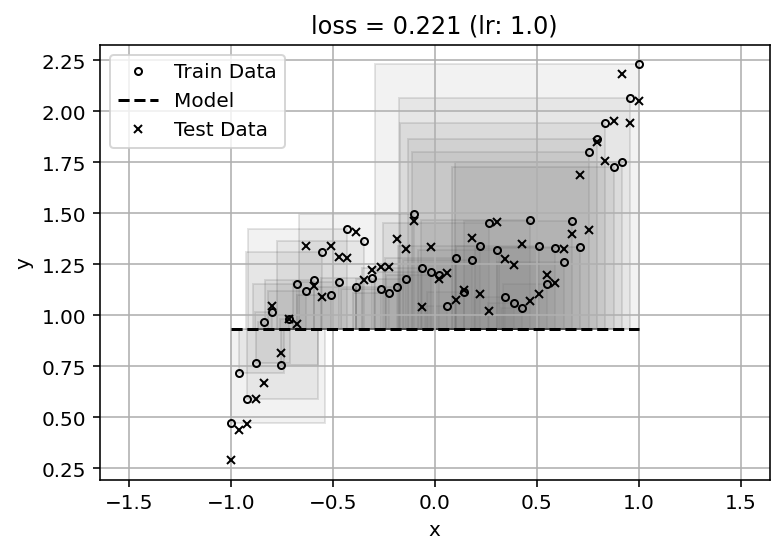

In [17]:
prediction_values = model(features_train)
final_loss = loss(labels_train, prediction_values)
plt.title("loss = {:1.3f} (lr: {})".format(final_loss, lr))
visualize_l2(prediction_values.numpy().reshape(-1), x_train, y_train, x_test, y_test)
plt.show()

In [18]:
model = MyModel()

# 하이퍼 파라미터
MaxEpochs = 200
batch_size = 10
lr = 0.05

# 수치최적화 알고리즘
optimizer = tf.keras.optimizers.Adam(lr)

# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features_train[shuffled_id]
shuffled_y_train = labels_train[shuffled_id]

# 손실함수 기록용 변수
loss_train_history = []
loss_test_history = []

# 스토캐스틱 방법
from helper import generate_batches
for epoch in range(MaxEpochs):
    if epoch % 100 == 0:
        curr_loss = loss(labels_train, model(features_train))
        print(epoch, curr_loss.numpy())
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    loss_train = loss(labels_train, model(features_train))
    loss_test = loss(labels_test, model(features_test))
    loss_train_history.append(loss_train)
    loss_test_history.append(loss_test)

0 7.2290406
100 0.017849708


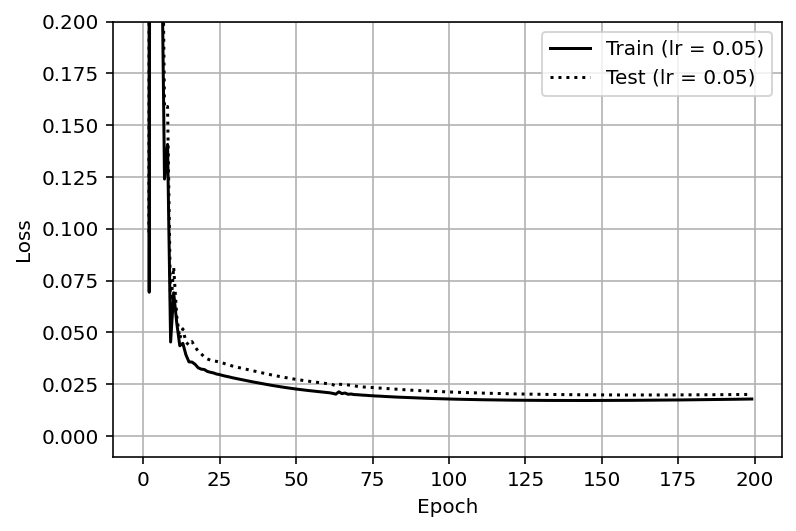

In [19]:
plt.plot(loss_train_history, '-k', label='Train (lr = {})'.format(lr))
plt.plot(loss_test_history, ':k', label='Test (lr = {})'.format(lr))
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([-.01, 0.2])
plt.legend()
plt.show()

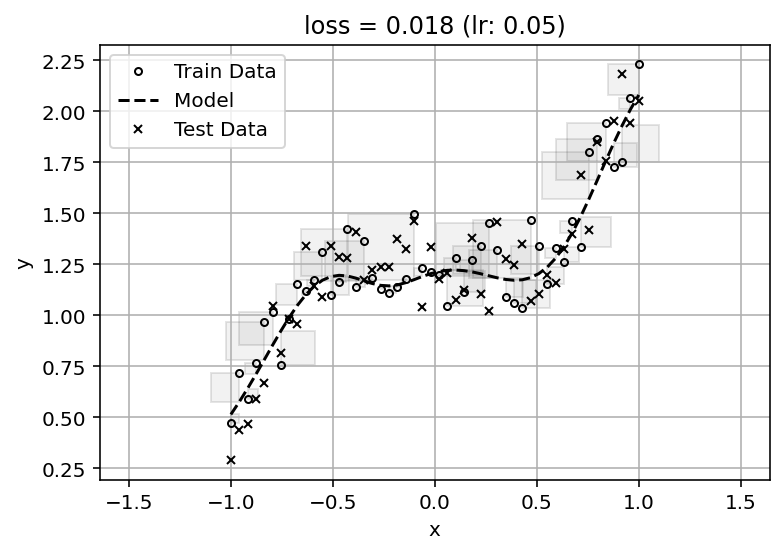

In [20]:
prediction_values = model(features_train)
final_loss = loss(labels_train, prediction_values)
plt.title("loss = {:1.3f} (lr: {})".format(final_loss, lr))
visualize_l2(prediction_values.numpy().reshape(-1), x_train, y_train, x_test, y_test)
plt.show()

## 13.3 모델 복잡도 증가

In [21]:
# 선형 모델
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.W1 = tf.Variable(tf.random.normal([1, 1], seed=624)) 
        self.b1 = tf.Variable(tf.random.normal([1], seed=624)) 

    def call(self, x):
        yhat = tf.matmul(x, self.W1) + self.b1
        return yhat

In [22]:
model = MyModel()

# 손실함수
loss = lambda y, yhat: tf.reduce_mean(tf.square( yhat - y ))

# 하이퍼 파라미터
MaxEpochs = 200
batch_size = 10
lr = 0.05

# 수치최적화 알고리즘
optimizer = tf.keras.optimizers.Adam(lr)

# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features_train[shuffled_id]
shuffled_y_train = labels_train[shuffled_id]

# 손실함수 기록용 변수
loss_train_history = []
loss_test_history = []

# 스토캐스틱 방법
from helper import generate_batches
for epoch in range(MaxEpochs):
    if epoch % 100 == 0:
        curr_loss = loss(labels_train, model(features_train))
        print(epoch, curr_loss.numpy())
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    loss_train = loss(labels_train, model(features_train))
    loss_test = loss(labels_test, model(features_test))
    loss_train_history.append(loss_train)
    loss_test_history.append(loss_test)

0 1.094558
100 0.044591736


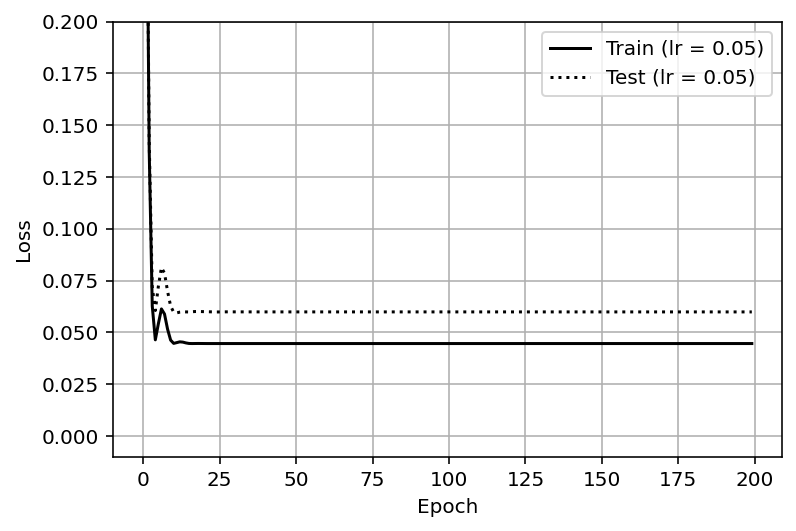

In [23]:
plt.plot(loss_train_history, '-k', label='Train (lr = {})'.format(lr))
plt.plot(loss_test_history, ':k', label='Test (lr = {})'.format(lr))
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([-.01, 0.2])
plt.legend()
plt.show()

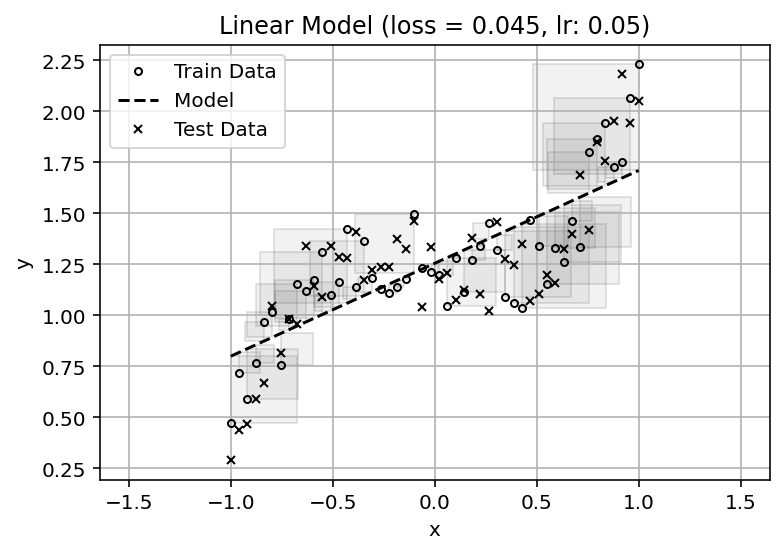

In [24]:
prediction_values = model(features_train)
final_loss = loss(labels_train, prediction_values)
plt.title("Linear Model (loss = {:1.3f}, lr: {})".format(final_loss, lr))
visualize_l2(prediction_values.numpy().reshape(-1), x_train, y_train, x_test, y_test)
plt.show()

### 신경망 모델

In [25]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 64
        num_hidden2 = 64

        self.W1 = tf.Variable(tf.random.normal([1, num_hidden1], seed=624)) 
        self.b1 = tf.Variable(tf.random.normal([num_hidden1], seed=624)) 

        self.W2 = tf.Variable(tf.random.normal([num_hidden1, num_hidden2], seed=624)) 
        self.b2 = tf.Variable(tf.random.normal([num_hidden2], seed=624)) 

        self.W3 = tf.Variable(tf.random.normal([num_hidden2, 1], seed=624)) 
        self.b3 = tf.Variable(tf.random.normal([1], seed=624)) 

    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1
        h1 = tf.nn.sigmoid(l1)

        l2 = tf.matmul(h1, self.W2) + self.b2
        h2 = tf.nn.sigmoid(l2)

        yhat = tf.matmul(h2, self.W3) + self.b3
        return yhat

In [26]:
model = MyModel()

loss = lambda y, yhat: tf.reduce_mean(tf.square( yhat - y ))

# 하이퍼 파라미터
MaxEpochs = 200
batch_size = 10
lr = 0.05

# 수치최적화 알고리즘
optimizer = tf.keras.optimizers.Adam(lr)

# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features_train[shuffled_id]
shuffled_y_train = labels_train[shuffled_id]

# 손실함수 기록용 변수
loss_train_history = []
loss_test_history = []

# 스토캐스틱 방법
from helper import generate_batches
for epoch in range(MaxEpochs):
    if epoch % 100 == 0:
        curr_loss = loss(labels_train, model(features_train))
        print(epoch, curr_loss.numpy())
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    loss_train = loss(labels_train, model(features_train))
    loss_test = loss(labels_test, model(features_test))
    loss_train_history.append(loss_train)
    loss_test_history.append(loss_test)

0 5.8588586
100 0.01662886


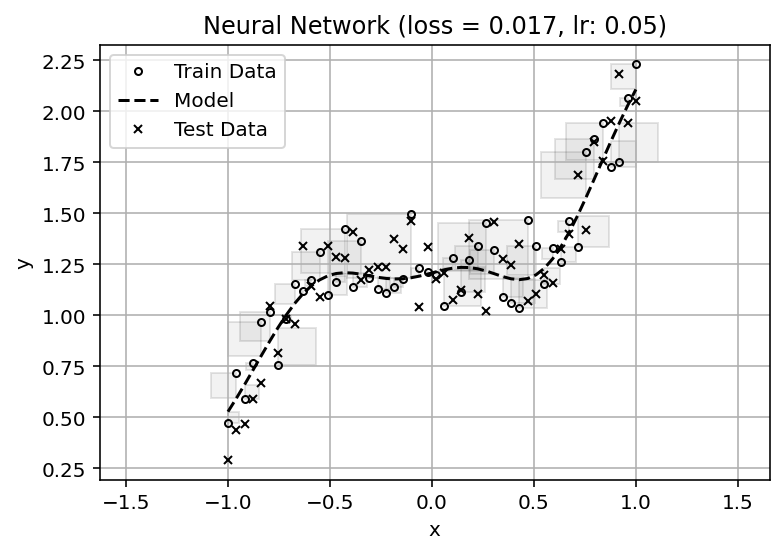

In [27]:
prediction_values = model(features_train)
final_loss = loss(labels_train, prediction_values)
plt.title("Neural Network (loss = {:1.3f}, lr: {})".format(final_loss, lr))
visualize_l2(prediction_values.numpy().reshape(-1), x_train, y_train, x_test, y_test)
plt.show()

## 13.4 언더피팅된 신경망 분류 모델

In [28]:
from sklearn.datasets import make_circles
from pandas import DataFrame

# 학습용 데이터 생성
xy_train, labels_train = make_circles(n_samples=50, noise=0.1, random_state=717)
labels_train = labels_train.reshape(-1,1)

# 테스트용 데이터 생성
xy_test, labels_test = make_circles(n_samples=50, noise=0.1, random_state=712)
labels_test = labels_test.reshape(-1,1)

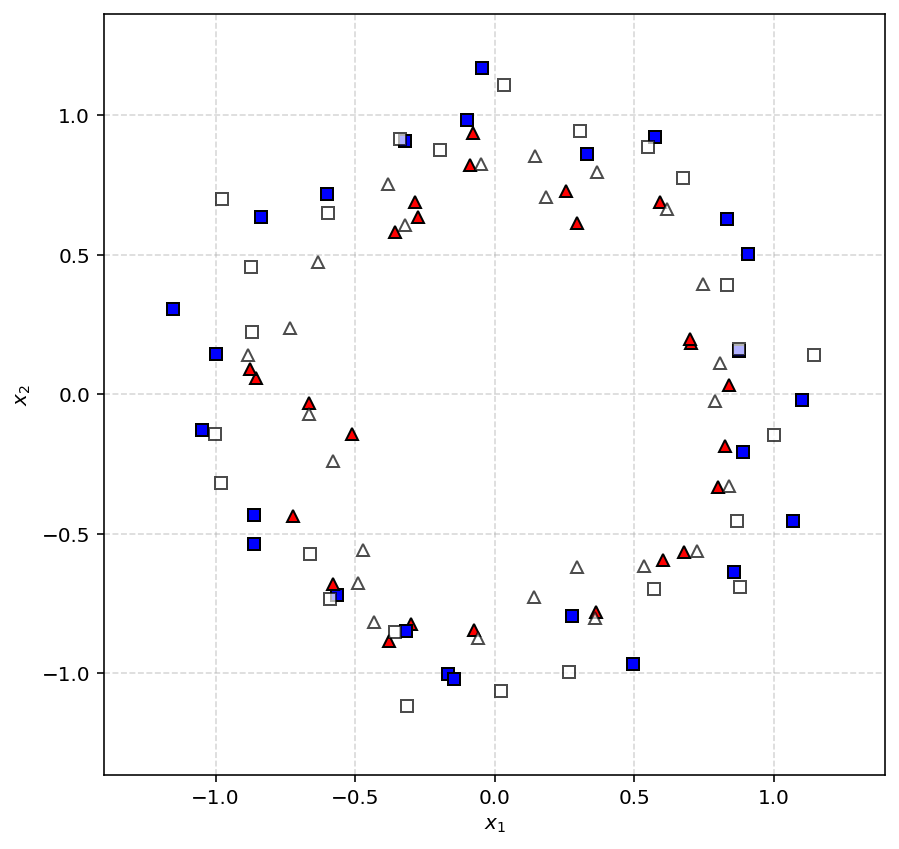

In [29]:
df = DataFrame(dict(x=xy_train[:,0], y=xy_train[:,1], label=labels_train.flatten()))
colors = {0:'red', 1:'blue'}
_, ax = plt.subplots(figsize=(7, 7))
grouped = df.groupby('label')
markers = {0:'bs', 1:'r^'}
for k, xy0 in df[['x', 'y']].iterrows():
    x0, y0 = xy0.values
    plt.plot(x0, y0, markers[labels_train[k][0]], mec='k')

markers = {0:'ws', 1:'w^'}    
df = DataFrame(dict(x=xy_test[:,0], y=xy_test[:,1], label=labels_test.flatten()))
for k, xy0 in df[['x', 'y']].iterrows():
    x0, y0 = xy0.values
    plt.plot(x0, y0, markers[labels_test[k][0]], mec='k', alpha=0.7)
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_xlim([-1.4, 1.4])
ax.set_ylim([-1.4, 1.4])

plt.show()

In [30]:
# 특성값 추출
f_fn = lambda x,y: [x, y]
features = np.array([f_fn(xval, yval) for xval, yval in xy_train])
features_test = np.array([f_fn(xval, yval) for xval, yval in xy_test])
dim_features = features.shape[1]

In [31]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 64
        num_hidden2 = 32

        self.W1 = tf.Variable(tf.random.normal([2, num_hidden1], seed=624)) 
        self.b1 = tf.Variable(tf.random.normal([num_hidden1], seed=624)) 

        self.W2 = tf.Variable(tf.random.normal([num_hidden1, num_hidden2], seed=624)) 
        self.b2 = tf.Variable(tf.random.normal([num_hidden2], seed=624)) 

        self.W3 = tf.Variable(tf.random.normal([num_hidden2, 1], seed=624)) 
        self.b3 = tf.Variable(tf.random.normal([1], seed=624)) 

    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1
        h1 = tf.nn.sigmoid(l1)

        l2 = tf.matmul(h1, self.W2) + self.b2
        h2 = tf.nn.sigmoid(l2)

        l3 = tf.matmul(h2, self.W3) + self.b3
        yhat = tf.nn.sigmoid(l3)
        return yhat

In [32]:
model = MyModel()

loss = lambda y, yhat: tf.reduce_mean(-y * tf.math.log(yhat) - (1-y) * tf.math.log(1-yhat))

In [33]:
# 정확도
def accuracy(x,y):
    yhat = model(x)
    correct_prediction = tf.equal(y, tf.round(yhat))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [34]:
lr = 0.5
optimizer = tf.keras.optimizers.SGD(lr)

loss_train_history = []
loss_test_history = []
acc_train_history = []
acc_test_history = []

# 데이터 섞기
np.random.seed(320)
shuffled_id = np.arange(0, len(features))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels_train[shuffled_id]

# 스토캐스틱 방법
MaxEpochs = 200
batch_size = 10
from helper import generate_batches
for epoch in range(MaxEpochs):
    if epoch % 100 == 0:
        curr_loss = loss(labels_train, model(features))
        print(epoch, curr_loss.numpy())
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    loss_train = loss(labels_train, model(features))
    loss_test = loss(labels_test, model(features_test))
    acc_train = accuracy(features, labels_train)
    acc_test = accuracy(features_test, labels_test)
    loss_train_history.append(loss_train)
    loss_test_history.append(loss_test)
    acc_train_history.append(acc_train)
    acc_test_history.append(acc_test)

0 1.4652089
100 0.54696316


In [35]:
prediction_values = model(features)
final_loss_train = loss(labels_train, prediction_values)
final_acc_train = accuracy(features, labels_train)

prediction_values_test = model(features_test)
final_loss_test = loss(labels_test, prediction_values_test)
final_acc_test = accuracy(features_test, labels_test)

In [36]:
def plot_model(model, feature_labmda, xy, labels, xy2, labels2, title=''):
    from pandas import DataFrame
    xx, yy = np.meshgrid(np.linspace(-1.3,1.3, 400), np.linspace(-1.3,1.3, 400))
    input_xy = np.array([feature_labmda(xxval, yyval) for xxval, yyval in zip(xx.flatten(), yy.flatten())])
    prediction = model(input_xy).numpy()
    Z = prediction.reshape(xx.shape)
    df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
    markers = {0:'bs', 1:'r^'}
    _, ax = plt.subplots(figsize=(7, 7))
    cs = ax.contourf(xx, yy, Z, 20, cmap='coolwarm', alpha=.8)
    ax.clabel(cs, colors='k')
    cs = ax.contour(xx, yy, Z, cmap='coolwarm', levels=[0, 0.5], linestyles='--', linewidths=2)
    ax.clabel(cs, colors='k')
    for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels[k][0]], mec='k')

    markers = {0:'ws', 1:'w^'}    
    df = DataFrame(dict(x=xy2[:,0], y=xy2[:,1], label=labels2.flatten()))
    for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels2[k][0]], mec='k', alpha=0.7)

    ax.set_xlim([-1.3, 1.3])
    ax.set_ylim([-1.3, 1.3])
    plt.grid(linestyle='--', alpha=0.5)
    plt.title(title)
    plt.show()

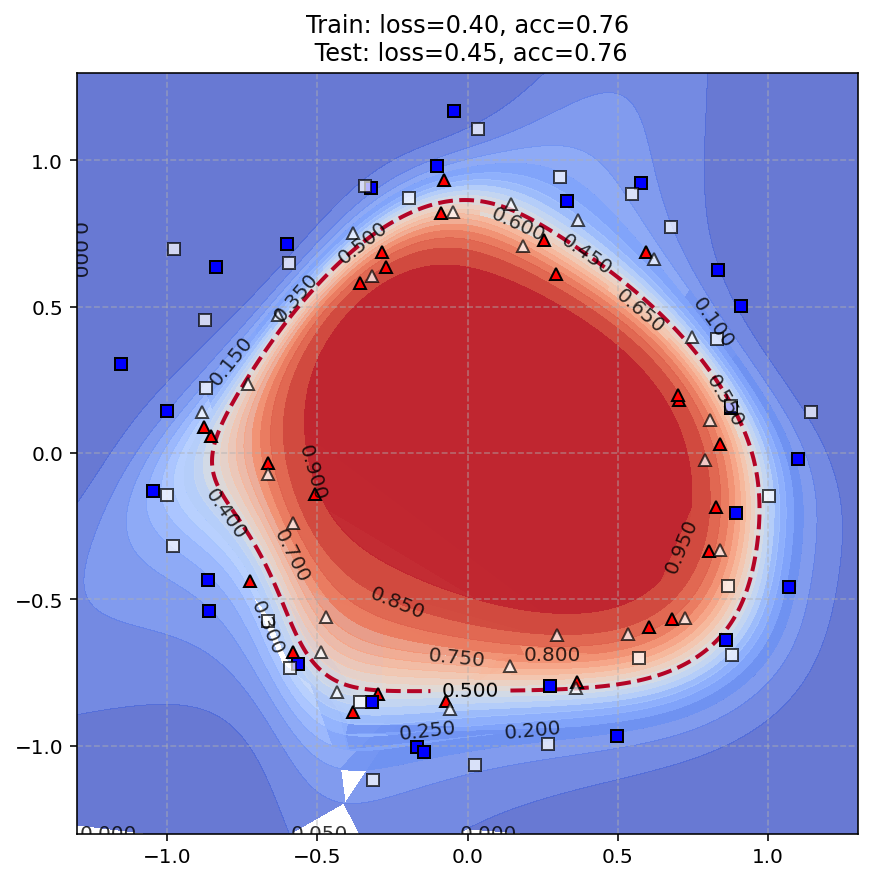

In [37]:
plot_model(model, f_fn, xy_train, labels_train, xy_test, labels_test, 
    'Train: loss={:1.2f}, acc={:1.2f}\n Test: loss={:1.2f}, acc={:1.2f}'.format(final_loss_train, final_acc_train, final_loss_test, final_acc_test))

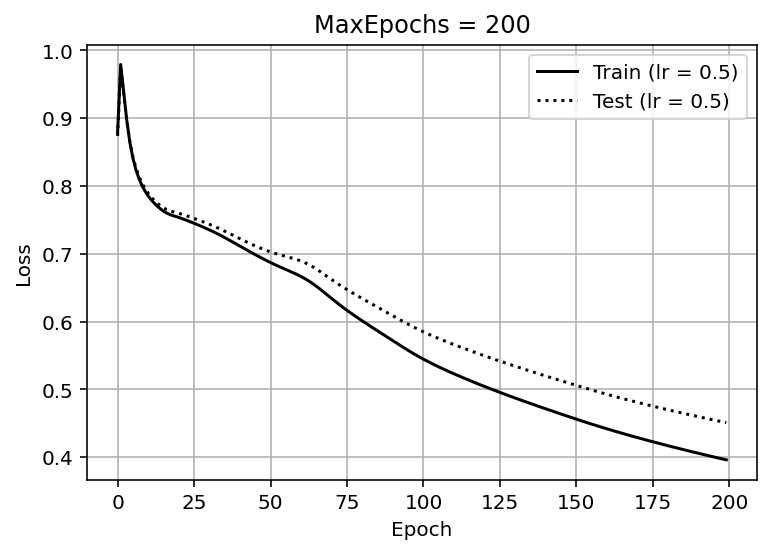

In [38]:
plt.plot(loss_train_history, '-k', label='Train (lr = {})'.format(lr))
plt.plot(loss_test_history, ':k', label='Test (lr = {})'.format(lr))
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MaxEpochs = {}'.format(MaxEpochs))
plt.legend()
plt.show()

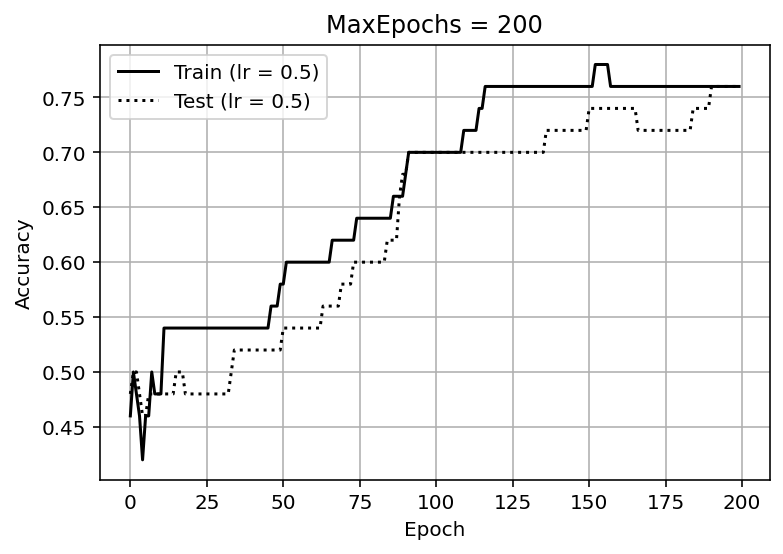

In [39]:
plt.plot(acc_train_history, '-k', label='Train (lr = {})'.format(lr))
plt.plot(acc_test_history, ':k', label='Test (lr = {})'.format(lr))
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('MaxEpochs = {}'.format(MaxEpochs))
plt.legend()
plt.show()

### 반복 횟수 재설정

In [40]:
model = MyModel()

lr = 0.5
optimizer = tf.keras.optimizers.SGD(lr)

loss_train_history = []
loss_test_history = []
acc_train_history = []
acc_test_history = []

np.random.seed(320)
shuffled_id = np.arange(0, len(features))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels_train[shuffled_id]

MaxEpochs = 630
batch_size = 10

from helper import generate_batches
for epoch in range(MaxEpochs):
    if epoch % 100 == 0:
        curr_loss = loss(labels_train, model(features))
        print(epoch, curr_loss.numpy())
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    loss_train = loss(labels_train, model(features))
    loss_test = loss(labels_test, model(features_test))
    acc_train = accuracy(features, labels_train)
    acc_test = accuracy(features_test, labels_test)
    loss_train_history.append(loss_train)
    loss_test_history.append(loss_test)
    acc_train_history.append(acc_train)
    acc_test_history.append(acc_test)

prediction_values = model(features)
final_loss_train = loss(labels_train, prediction_values)
final_acc_train = accuracy(features, labels_train)

prediction_values_test = model(features_test)
final_loss_test = loss(labels_test, prediction_values_test)
final_acc_test = accuracy(features_test, labels_test)

0 0.86574453
100 0.6134414
200 0.4176001
300 0.30935365
400 0.26103944
500 0.2304592
600 0.21747962


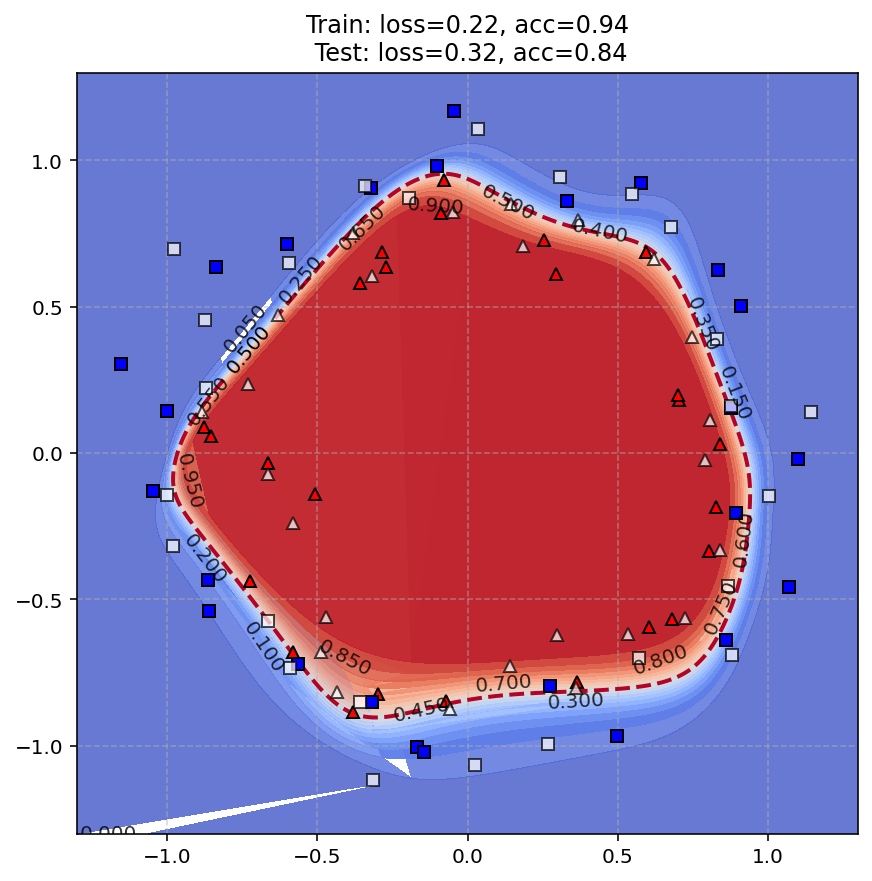

In [41]:
plot_model(model, f_fn, xy_train, labels_train, xy_test, labels_test, 
    'Train: loss={:1.2f}, acc={:1.2f}\n Test: loss={:1.2f}, acc={:1.2f}'.format(final_loss_train, final_acc_train, final_loss_test, final_acc_test))

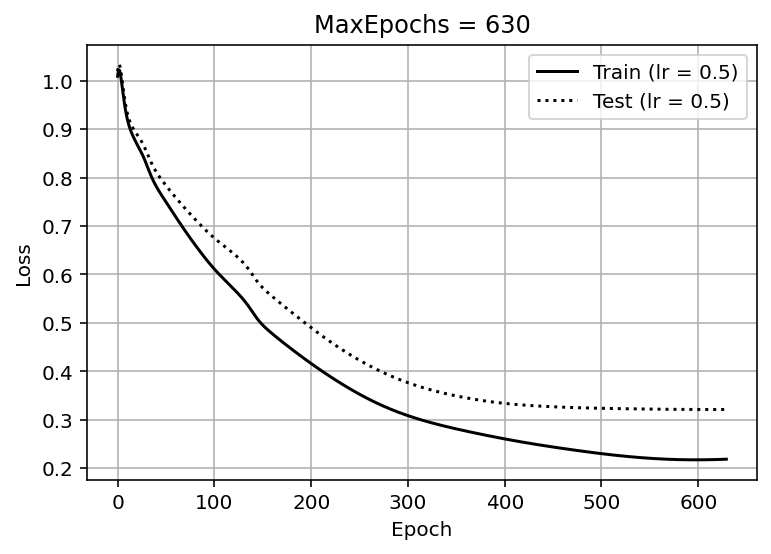

In [42]:
plt.plot(loss_train_history, '-k', label='Train (lr = {})'.format(lr))
plt.plot(loss_test_history, ':k', label='Test (lr = {})'.format(lr))
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MaxEpochs = {}'.format(MaxEpochs))
plt.legend()
plt.show()

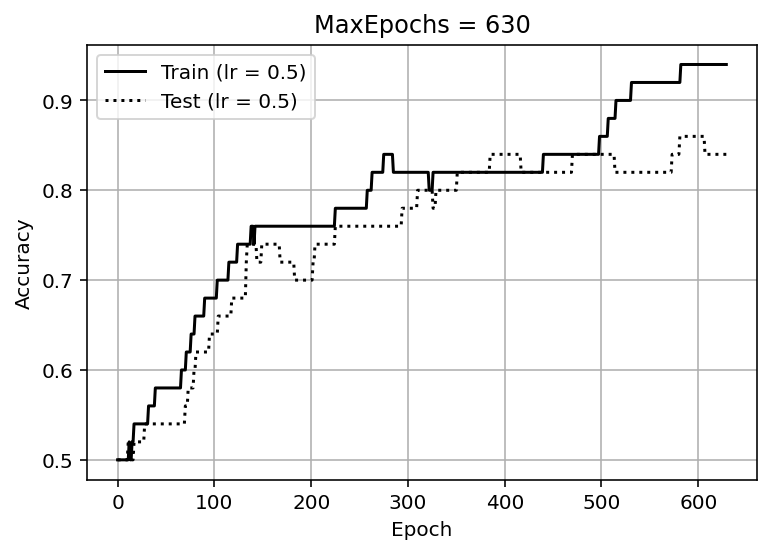

In [43]:
plt.plot(acc_train_history, '-k', label='Train (lr = {})'.format(lr))
plt.plot(acc_test_history, ':k', label='Test (lr = {})'.format(lr))
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('MaxEpochs = {}'.format(MaxEpochs))
plt.legend()
plt.show()